<a href="https://colab.research.google.com/github/rohithmn01/prom_forecast/blob/main/facebook_prophet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import requests
import copy 
import pandas as pd
URL = "http://34.67.240.237:30000/api/v1/query?query=node_memory_MemFree_bytes{instance=\"10.56.0.2:9100\",job=\"node-exporter\"}[1d]" 
r = requests.get(url = URL) 

data = r.json()

data_dict={}
metric_list = []

for i in data['data']['result']:
    counter=0
    for j in i['values']:
        data_dict = copy.deepcopy(i['metric'])
        data_dict['time'] = j[0]
        data_dict['value'] = j[1]
        metric_list.append(data_dict)        
  
df_metric = pd.DataFrame(metric_list)

df1 = df_metric[['time', 'value']]
df1['time'] = pd.to_datetime(df1['time'],unit='s')
df1 = df1.set_index('time')
df1["value"] = df1.values.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df1

,value
time,
2021-08-29 11:45:12.460000038,2.615091e+09
2021-08-29 11:45:17.460000038,2.614931e+09
2021-08-29 11:45:22.460000038,2.615648e+09
2021-08-29 11:45:27.460000038,2.615190e+09
2021-08-29 11:45:32.460000038,2.616164e+09
...,...
2021-08-30 11:44:47.460000038,2.587054e+09
2021-08-30 11:44:52.460000038,2.587222e+09
2021-08-30 11:44:57.460000038,2.584273e+09


In [16]:
df1=df1.reset_index()

In [17]:
df1 = df1.rename(columns={'value': 'y', 'time':'ds'})

In [18]:
df1.head()

,ds,y
0,2021-08-29 11:45:12.460000038,2.615091e+09
1,2021-08-29 11:45:17.460000038,2.614931e+09
2,2021-08-29 11:45:22.460000038,2.615648e+09
3,2021-08-29 11:45:27.460000038,2.615190e+09
4,2021-08-29 11:45:32.460000038,2.616164e+09


In [19]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [20]:
df1['y_orig'] = df1['y'] # to save a copy of the original data..we'll see why shortly. 
df1['y'] = np.log(df1['y'])

In [22]:
df1.tail()

,ds,y,y_orig
17275,2021-08-30 11:44:47.460000038,21.673786,2.587054e+09
17276,2021-08-30 11:44:52.460000038,21.673851,2.587222e+09
17277,2021-08-30 11:44:57.460000038,21.672710,2.584273e+09
17278,2021-08-30 11:45:02.460000038,21.673752,2.586968e+09
17279,2021-08-30 11:45:07.460000038,21.673586,2.586538e+09


In [23]:
model = Prophet() #instantiate Prophet
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''

#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=10, freq = 'H')
future_data.tail(15)

,ds
17275,2021-08-30 11:44:47.460000038
17276,2021-08-30 11:44:52.460000038
17277,2021-08-30 11:44:57.460000038
17278,2021-08-30 11:45:02.460000038
17279,2021-08-30 11:45:07.460000038
17280,2021-08-30 12:45:07.460000038
17281,2021-08-30 13:45:07.460000038
17282,2021-08-30 14:45:07.460000038
17283,2021-08-30 15:45:07.460000038
17284,2021-08-30 16:45:07.460000038


In [26]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
17275,2021-08-30 11:44:47.460000038,21.673464,21.672985,21.673980
17276,2021-08-30 11:44:52.460000038,21.673463,21.672982,21.673949
17277,2021-08-30 11:44:57.460000038,21.673463,21.672991,21.673951
17278,2021-08-30 11:45:02.460000038,21.673462,21.672974,21.673938
17279,2021-08-30 11:45:07.460000038,21.673462,21.672976,21.673946
17280,2021-08-30 12:45:07.460000038,21.673058,21.672575,21.673570
17281,2021-08-30 13:45:07.460000038,21.672655,21.672091,21.673237
17282,2021-08-30 14:45:07.460000038,21.672251,21.671528,21.672998
17283,2021-08-30 15:45:07.460000038,21.671848,21.670893,21.672894
17284,2021-08-30 16:45:07.460000038,21.671444,21.670207,21.672723


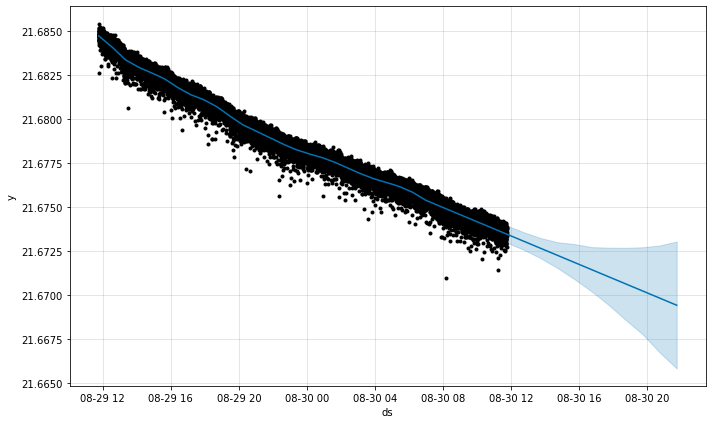

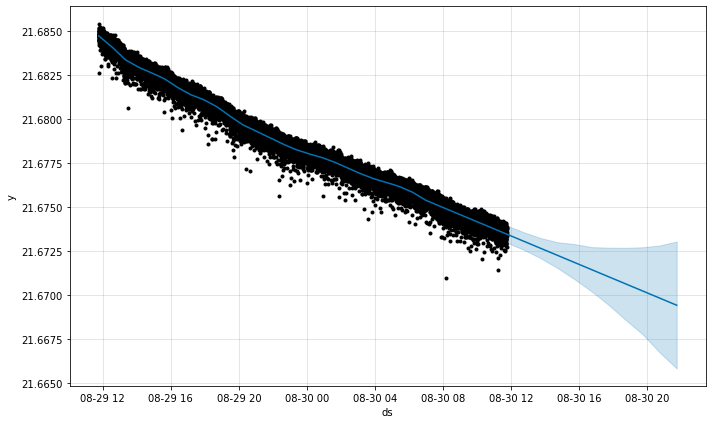

In [27]:
model.plot(forecast_data)

In [29]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])


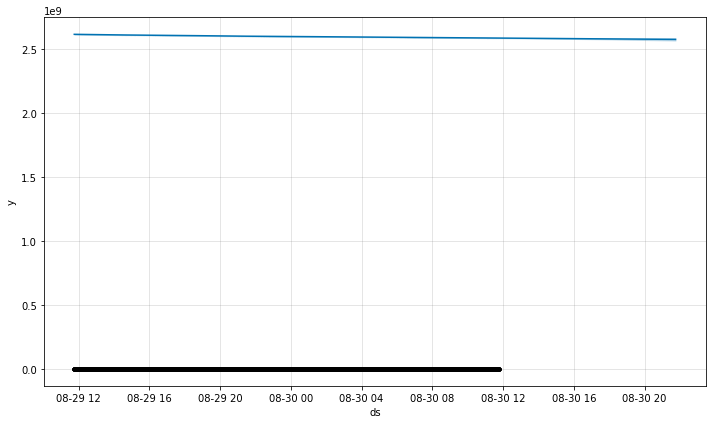

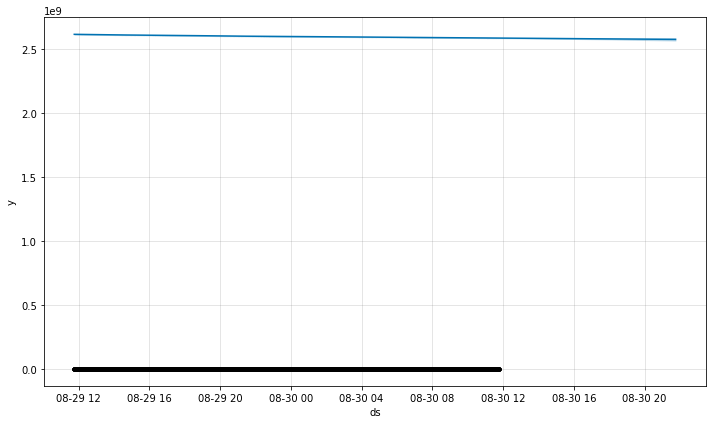

In [30]:
model.plot(forecast_data_orig)

In [32]:
df1['y_log']=df1['y'] #copy the log-transformed data to another column
df1['y']=df1['y_orig']

In [33]:
final_df = pd.DataFrame(forecast_data_orig)

In [34]:
import plotly.graph_objs as go
import plotly.offline as py

In [36]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df1["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

In [38]:
pwd

'/content'